In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train),  28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
# 给数据添加噪声
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

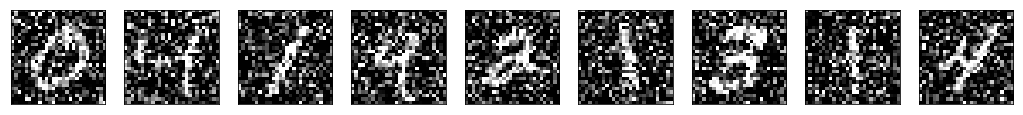

In [3]:
# 噪声数据展示
n = 10  
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [64]:
from keras.layers import Input, Dense, UpSampling2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Model
# 输入维度
input_img = Input(shape=(28, 28, 1))
# 基于卷积和池化的编码器
x = Convolution2D(32, kernel_size=(3, 3), activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(32, kernel_size=(3, 3), activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)
# 基于卷积核上采样的解码器
x = Convolution2D(32, kernel_size=(3, 3), activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(32, kernel_size=(3, 3), activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, kernel_size=(3, 3), activation='sigmoid', border_mode='same')(x)
# 搭建模型并编译
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu")`
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu")`
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:12: UserWarning: Update y

In [65]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 14, 14, 32)        0         
__________

In [66]:
# 对噪声数据进行自编码训练
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1774 - val_loss: 0.1232
Epoch 2/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1190 - val_loss: 0.1116
Epoch 3/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1121 - val_loss: 0.1073
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1086 - val_loss: 0.1061
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1061 - val_loss: 0.1039
Epoch 6/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1045 - val_loss: 0.1027
Epoch 7/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1033 - val_loss: 0.1039
Epoch 8/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1024 - val_loss: 0.1011
Epoch 9/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1016 - val_loss: 0.0

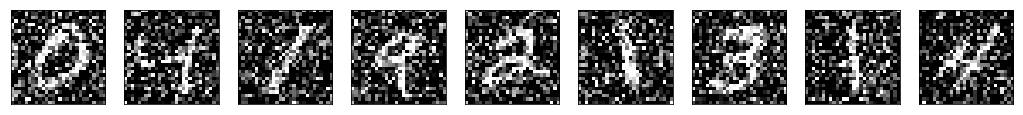

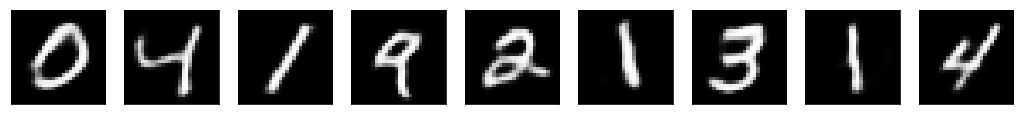

In [67]:
# 噪声数据展示
n = 10  
plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(autoencoder.predict(x_train_noisy[i].reshape(1, 28, 28, 1)).reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
x_train_noisy[i].reshape(1,1,28, 28).shape

(1, 1, 28, 28)

In [46]:
x_test_noisy

(10000, 1, 28, 28)